Problem Statement: - 

A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data 
and come up with different rules of movie list so that the business objective is achieved.


Business Objectives:

1)Find the pattern of viewers which movie they mostly see. Give prefrence for director or actor.
2)Find which movie they like to see like comedy, horrible, romantic, etc..
3)Recommend the movies according to viewers choice.
4)So that sales of movies is also increase and viewers also get movies according to them.

In [42]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movie = pd.read_csv("C:/Assignments(DS)/my_movies.csv")

Exploratory Data Analysis (EDA)

In [4]:
movie.shape
#10 rows and 10 columns

(10, 10)

In [5]:
movie.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [6]:
movie.dtypes
#all columns datatypes are in integer

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [7]:
movie.isnull().sum()
#there is no any null value

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [9]:
movie.describe()
#there is no large differnce between min, max, std hence there is no need of normalization.

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Pre-Processing

In [10]:
#We check outlier of each column

<Axes: >

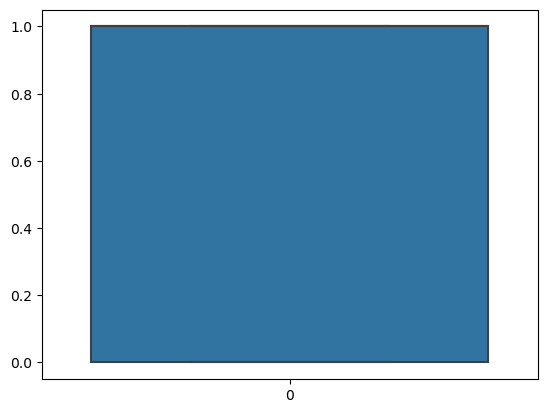

In [11]:
sns.boxplot(movie['Sixth Sense'])
#no outlier

<Axes: >

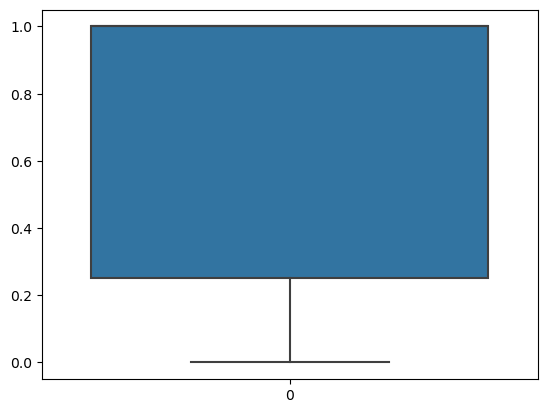

In [12]:
sns.boxplot(movie['Gladiator'])
#no outlier

<Axes: >

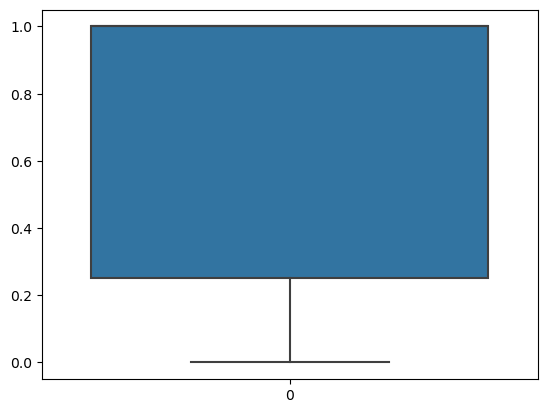

In [13]:
sns.boxplot(movie['Gladiator'])
#no outlier

<Axes: >

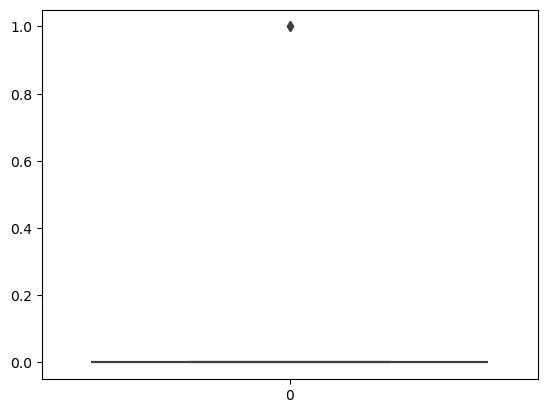

In [14]:
sns.boxplot(movie['LOTR1'])
#outlier is present 

<Axes: >

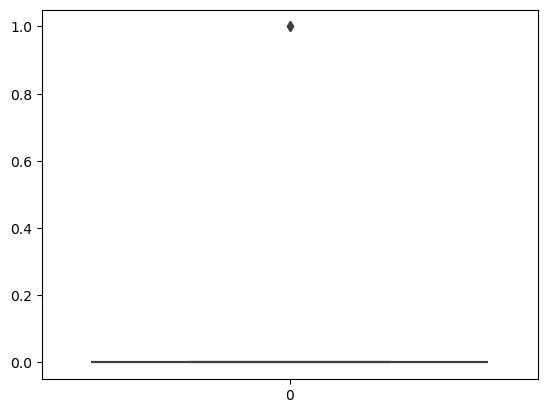

In [15]:
sns.boxplot(movie['Harry Potter1'])
#outlier


<Axes: >

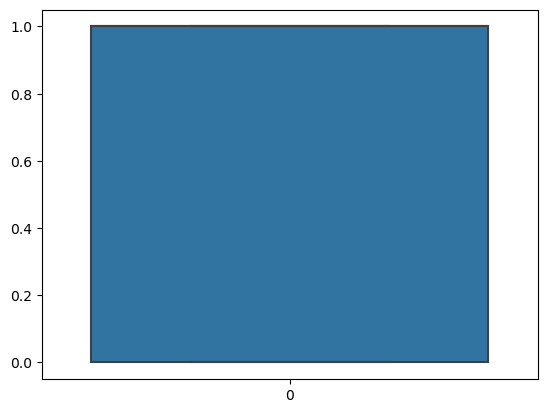

In [16]:
sns.boxplot(movie['Patriot'])
#no outlier

<Axes: >

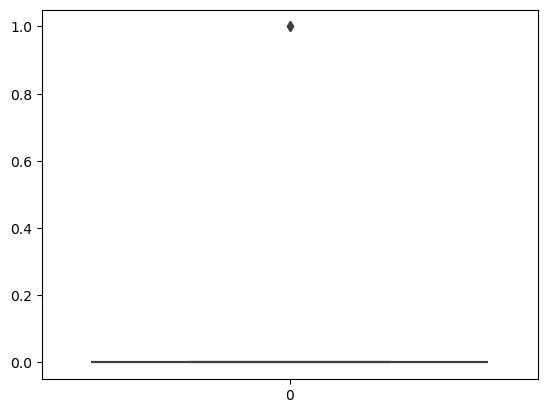

In [17]:
sns.boxplot(movie['LOTR2'])
#outlier


<Axes: >

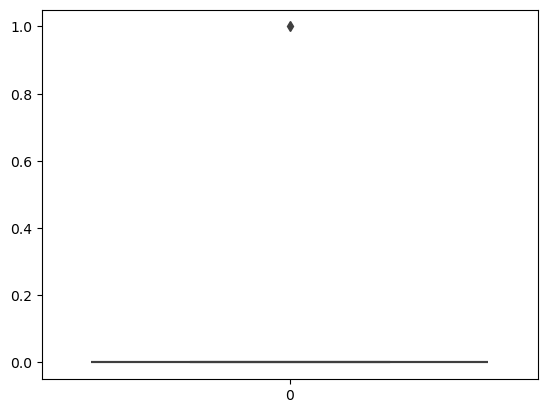

In [18]:
sns.boxplot(movie['Harry Potter2'])
#outlier


<Axes: >

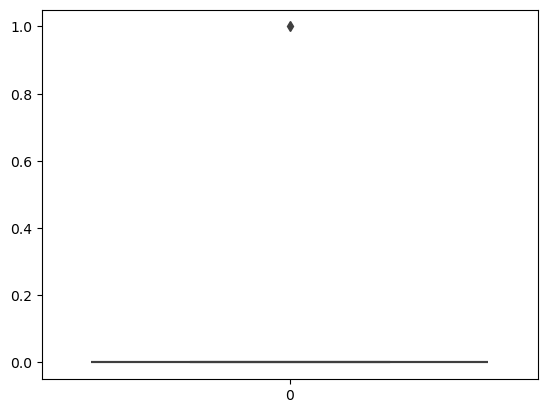

In [19]:
sns.boxplot(movie['LOTR'])
#outlier


<Axes: >

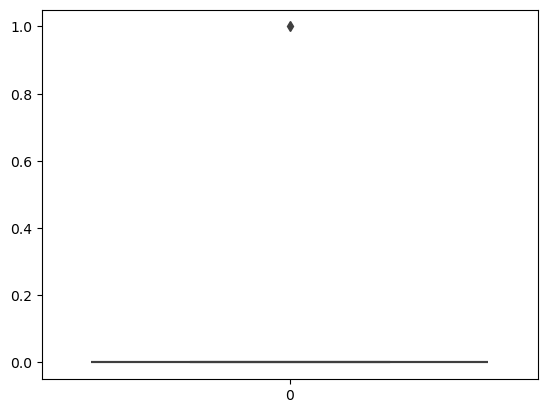

In [20]:
sns.boxplot(movie['Braveheart'])
#outlier


<Axes: >

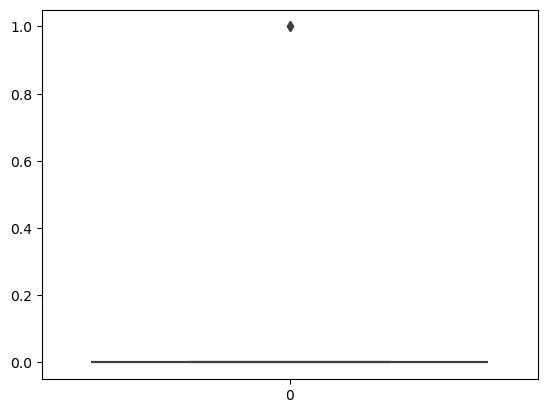

In [21]:
sns.boxplot(movie['Green Mile'])
#outlier


In [22]:
#fro above boxplot it is observe that 
#['LOTR1','Harry Potter1','LOTR2','Harry Potter2','LOTR','Braveheart','Green Mile'] this columns has outlier
#this is remove by IQR technique

<Axes: >

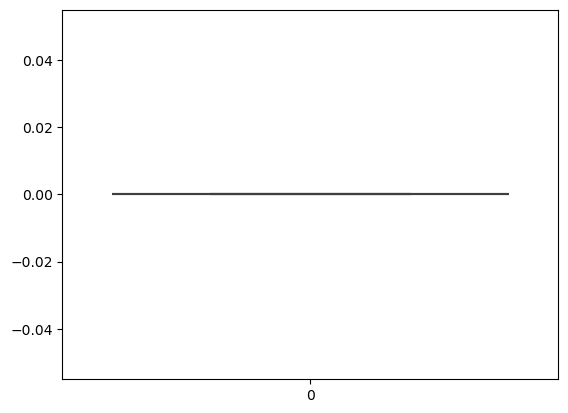

In [25]:
#1)LOTR1
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['LOTR1'].quantile(0.25)
q3 = movie['LOTR1'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['LOTR1'] = movie.loc[(movie['LOTR1']>=lower_limit) & (movie['LOTR1']<=upper_limit), 'LOTR1']
sns.boxplot(movie['LOTR1'])
#again from box plot we can see that outlier has removed

<Axes: >

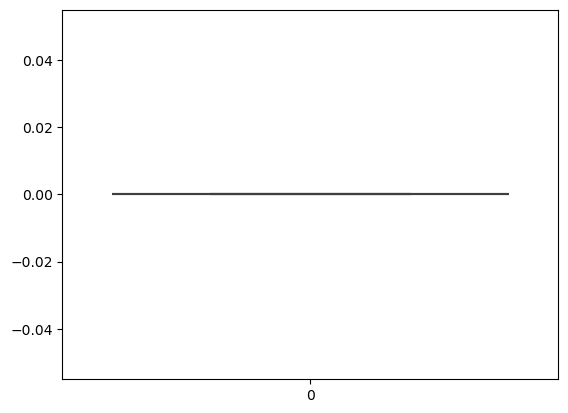

In [26]:
#2)Harry Potter1
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['Harry Potter1'].quantile(0.25)
q3 = movie['Harry Potter1'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['Harry Potter1'] = movie.loc[(movie['Harry Potter1']>=lower_limit) & (movie['Harry Potter1']<=upper_limit), 'Harry Potter1']
sns.boxplot(movie['Harry Potter1'])
#again from box plot we can see that outlier has removed

<Axes: >

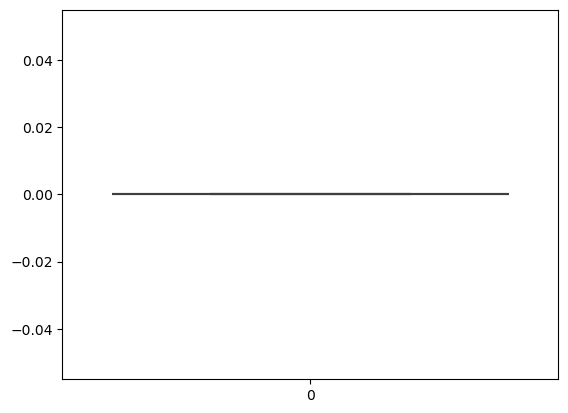

In [27]:
#3)LOTR2
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['LOTR2'].quantile(0.25)
q3 = movie['LOTR2'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['LOTR2'] = movie.loc[(movie['LOTR2']>=lower_limit) & (movie['LOTR2']<=upper_limit), 'LOTR2']
sns.boxplot(movie['LOTR2'])
#again from box plot we can see that outlier has removed

<Axes: >

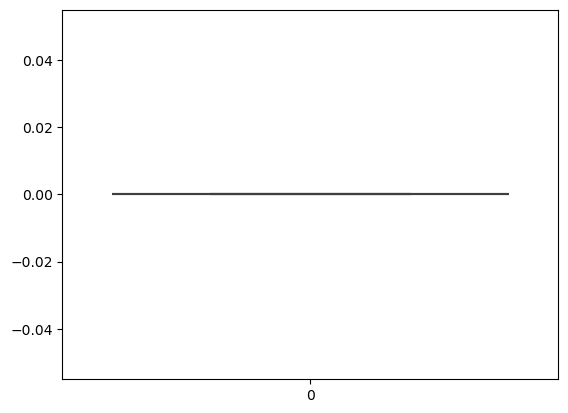

In [28]:
#4)Harry Potter2
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['Harry Potter2'].quantile(0.25)
q3 = movie['Harry Potter2'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['Harry Potter2'] = movie.loc[(movie['Harry Potter2']>=lower_limit) & (movie['Harry Potter2']<=upper_limit), 'Harry Potter2']
sns.boxplot(movie['Harry Potter2'])
#again from box plot we can see that outlier has removed

<Axes: >

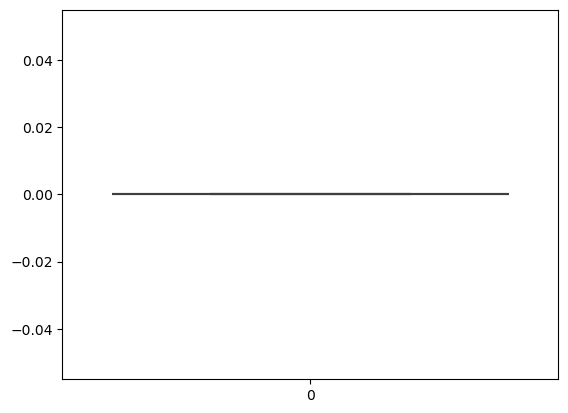

In [29]:
#5)LOTR
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['LOTR'].quantile(0.25)
q3 = movie['LOTR'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['LOTR'] = movie.loc[(movie['LOTR']>=lower_limit) & (movie['LOTR']<=upper_limit), 'LOTR']
sns.boxplot(movie['LOTR'])
#again from box plot we can see that outlier has removed

<Axes: >

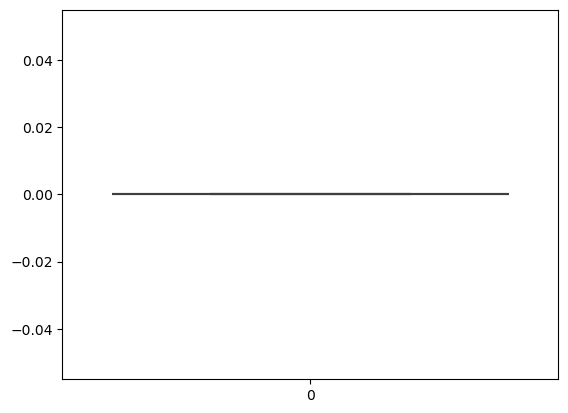

In [30]:
#6)Braveheart 
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['Braveheart'].quantile(0.25)
q3 = movie['Braveheart'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['Braveheart'] = movie.loc[(movie['Braveheart']>=lower_limit) & (movie['Braveheart']<=upper_limit), 'Braveheart']
sns.boxplot(movie['Braveheart'])
#again from box plot we can see that outlier has removed

<Axes: >

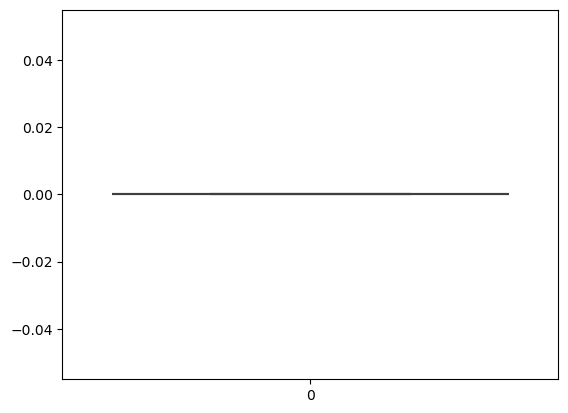

In [31]:
#7)Green Mile
#q1=0.25 percentile
#q3=0.75 percentile
q1 = movie['Green Mile'].quantile(0.25)
q3 = movie['Green Mile'].quantile(0.75)
iqr = q2-q1
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
movie['Green Mile'] = movie.loc[(movie['Green Mile']>=lower_limit) & (movie['Green Mile']<=upper_limit), 'Green Mile']
sns.boxplot(movie['Green Mile'])
#again from box plot we can see that outlier has removed

In [32]:
movie.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            2
Harry Potter1    2
Patriot          0
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [33]:
#now here sum null value is generated 
#we can remove it by mean imputation
movie.fillna(movie.mean(),inplace=True)

In [34]:
movie.isnull().sum()
#now there is no any null value present

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [36]:
#step 1: convert the dataset into a format suitable for Apriori 
a = TransactionEncoder()
k = a.fit_transform(movie)
movie1 = pd.DataFrame(k,columns=a.columns_ )

In [38]:
#step 2: Apply apriori algorithm to find frequent itemset
for support in [0.05,0.04,0.03,0.02,0.01]:
    frequent = apriori(movie1, min_support=support, use_colnames=True)
    print(f"min_support={support}, number of frequent itemsets: {len(frequent)}")

min_support=0.05, number of frequent itemsets: 2669
min_support=0.04, number of frequent itemsets: 2669
min_support=0.03, number of frequent itemsets: 2669
min_support=0.02, number of frequent itemsets: 2669
min_support=0.01, number of frequent itemsets: 2669


In [40]:
item_frequencies = movie1.sum().sort_values(ascending=False)
print("Item Frequencies:\n", item_frequencies)

Item Frequencies:
 t    6
r    6
a    5
e    5
o    4
i    4
     4
O    3
P    3
R    3
T    3
L    3
H    2
2    2
G    2
n    2
l    2
y    2
h    2
1    2
d    1
B    1
s    1
S    1
v    1
x    1
M    1
dtype: int64


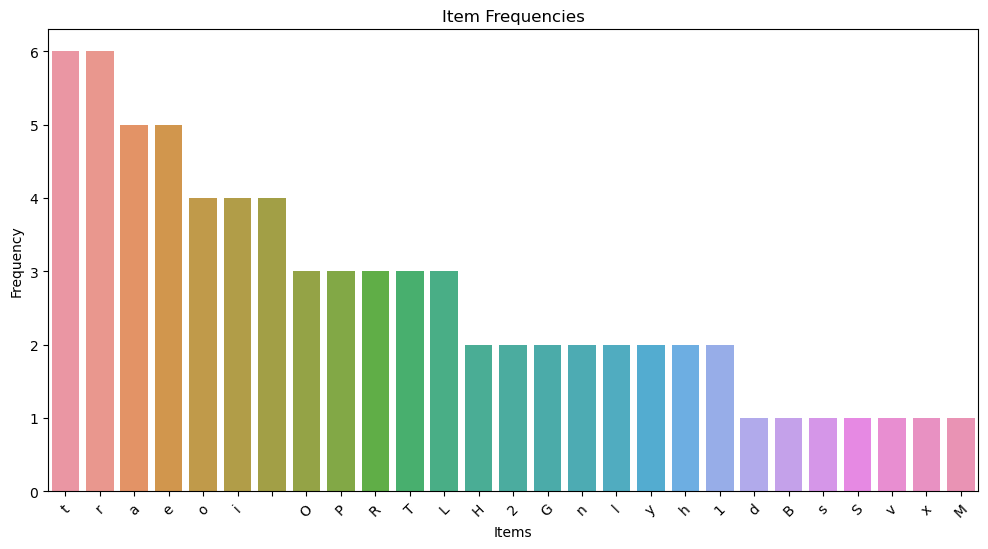

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequencies.index, y=item_frequencies.values)
plt.xticks(rotation=45)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.show()

In [44]:
# Load your data (already done)
df = pd.read_csv("C:/Assignments(DS)/my_movies.csv")  # Update with your file path if needed


In [45]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)


C:\Users\om\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
# View the frequent itemsets
print(frequent_itemsets)


    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (Sixth Sense,

In [47]:
#step 3: Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# print(rules)
print(rules[['antecedents','consequents','support','confidence']])

         antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4      (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
233    (Sixth Sense)        (Harry Potter1, Green Mile, LOTR1, LOTR2)   
234          (LOTR1)  (Harry Potter1, Green Mile, Sixth Sense, LOTR2)   
235          (LOTR2)  (Harry Potter1, LOTR1, Sixth Sense, Green Mile)   
236  (Harry Potter1)          (Green Mile, LOTR1, Sixth Sense, LOTR2)   
237     (Green Mile)       (Harry Potter1, LOTR1, Sixth Sense, LOTR2)   

     support  confidence  
0        0.5    0.833333  
1        0.5    0.714286  
2        0.4    0.666667  
3        0.4   


Antecedents:
    Antecedents refer to the item(s) that appear on the left-hand side of an 
    association rule, representing the "if" part of the rule.
    
Consequent:
    Consequent refers to the item(s) that appear on the right-hand side of an 
    association rule.
    
Support:
    Support measures how frequently an itemset appears in the dataset.
    Support(X)=Transactions containing X / Total number of transactions
    
Confidence:
    Confidence measures the likelihood of seeing the consequent given the antecedent.
    Confidence(X→Y)=Support(X and Y)/Support(X)


Benefits :-

Personalized Recommendations: Customers receive tailored movie suggestions that match their preferences, enhancing their overall viewing experience.

Increased Satisfaction: With more relevant content, customers are likely to be more satisfied, leading to greater engagement and loyalty.
    
Time-Saving: By showing movies that align with their tastes, customers spend less time searching for something